## 외부 카메라 이용
1. PC 카메라는 바로 사용이 가능
2. 외부 기기에 있는 카메라를 PC에서 이용할 때는 외부 기기의 카메라를 접근할 수 있도록 애플리케이션을 설치해야 합니다.
- 안드로이드 폰이나 iPhone에서 직접 OpenCV 코드를 사용하는 경우엔 어플리케이션을 설치해야 PC카메라와 동일하게 작동합니다.
- 안드로이드 폰은 b

In [4]:
pip install opencv-python
pip install opencv-contrib-python

SyntaxError: invalid syntax (<ipython-input-4-eba89a4e8e67>, line 1)

In [9]:
import cv2

# 안드로이드 폰에서 확인하는 방법
# 드로이드를 설치하면 ip주소와 port번호가 나오는데 그걸 아래 에 넣으면 됩니다
cap = cv2.VidioCapture('http://172.30.1.32:4747/mjpegfeed')
frame_size = (int(cap.get(cv2.Ca)))


AttributeError: module 'cv2.cv2' has no attribute 'VidioCapture'

### 2. OpenCV기본 연산
- OpenCV파이썬 버전에서는 영상을 읽으면 numpy.ndarray로 읽어서 리턴합니다.
- 영상을 읽은 후에는 shape와 dtype을 이용해서 구조와 자료형을 확인하고 astype()과 reshape를 이용해서 자료형을 변경하거나 구조를 변경합니다.
- 행과 열 순으로 인덱스를 설정해서 밝기나 컬러값에 접근이 가능하고 수정 가능합니다.

#### numpy나 OpenCV자료형을 볼 때 주의할 점
- numpy는 C++과 Fortran버전이 있고 OpenCV는 기본적으로 C++로 작성되어 있습니다.
- 파이썬에는 숫자가 int와 float그리고 complex(복소수)가 있습니다. numpy나 OpenCV는 부호있는 정수 타입(signed int)과 부호없는 정수(unsigned int)타입 그리고 크기에 따라 분류를 합니다.
- 8, 16, 32, 64의 형태로 나눕니다. 예를 들어 numpy.uint8, cv2.CV_8U 로 표현합니다. 
- numpy의 경우 부호가 있으면 아무런 기호를 붙이지 않지만 OpenCV에서는 부호가 없으면 U부호가 있으면 S를 붙입니다.
- OpenCV나 ML을 공부할 때는 numpy의 ndarray에 대해서 학습을 하고 연산 방법들에 대해서도 알아두는 것이 좋습니다.

## 기본 연산

### 영상 속성 사용

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/images/lena.jpg')
print('img의 타입 : ', type(img))

print('차원의 수 : ', img.ndim)

# 512, 512는 가로와 세로의 차원(너비와 높이), 3은 채널의 수(3- BGR순서
print('shape 확인 : ', img.shape)
print('각 데이터 자료형 : ', img.dtype)

# 각 데이터의 자료형 변경
# opencv 버전이 높아지면서 실수 자료형을 사용할 수 있었던게 정수 자료형으로 변경된 경우가 종종 있습니다.
img = img.astype(np.int32)
print('각 데이터 자료형 : ', img.dtype)

print(img[0])

img의 타입 :  <class 'numpy.ndarray'>
차원의 수 :  3
shape 확인 :  (512, 512, 3)
각 데이터 자료형 :  uint8
각 데이터 자료형 :  int32
[[128 138 225]
 [127 137 224]
 [126 136 224]
 ...
 [126 145 236]
 [110 129 220]
 [ 86 104 197]]


### 2. 이미지 크기 변경
#### resize(이미지 데이터, (가로 크기, 세로 크기)

- 이미지의 크기가 서로 다르면 머신 러닝이나 딥러닝을 올바르게 수행하기 어렵습니다.
- 딥 러닝의 경우는 반드시 입력 차원의 크기를 맞추어야 하기 때문에 반드시 수행해야 하는데 전이 학습을 이용할 때는 하지 않는 경우도 있습니다.(자연어의 경우는 padding으로 입력의 차원을 맞춥니다.)
- 전이 학습의 전처리 단계에서 대신 수행을 해주기 때문입니다.
- 머신 러닝에서 많이 사용하는 이미지 크기는 32x32, 64x64, 96x96.....32비트단위인데 이전까지의 머신들이 32비트 단위로 처리를 많이 했기 때문입니다. 그런데 요즘 머신들은 64비트 단위로 처리합니다.
- 이미지의 크기가 너무 크면 줄여서 학습하는 것이 좋습니다. 이미지가 너무 크면 과적합되어 픽셀 하나만 달라져도 틀린 예측이 되기 때문입니다.
- flatten()은 배열을 1차원으로 만들어주는 함수입니다.
- reshape()를 할 때 줄이거나 늘릴 때 -1을 주는 경우는 나머지에 할당을 하고 남는게 있으면 여기에 할당하라는 의미입니다.

#### 이미지 크기변경과 구조 변경

(512, 512, 3)


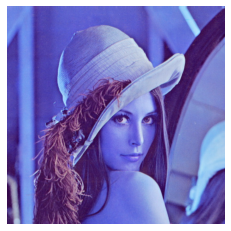

(64, 64, 3)


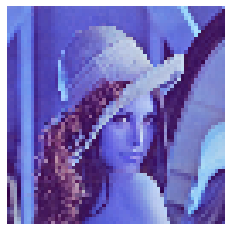

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg')

print(img.shape)
# 이미지 출력
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# 이미지 크기 변경
img1 = cv2.resize(img, (64, 64))

print(img1.shape)
# 크기 변경된 이미지 출력
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

#### 1차원으로 변경
- (4096, )의 뒤에 컴마(,)는 이차원이라는 의미가 아니라 tuple을 의미
- 숫자 하나만 사용하면 tuple로 인식하지 않고 정수로 인식하기 때문에 숫자 하나인 튜플을 만들 때 ,를 추가합니다.

In [27]:
print(img.flatten().shape)
print(img.reshape(-1, 64, 64).shape)

(786432,)
(192, 64, 64)


### 3.ROI(Region of Interest - 이미지 내 관심 영역) - 화소 접근
- Region of Image : 관심영역
- 이를 이용하여 특정영역만 사각형을 만들 수 있습니다. (bbox)


1. 화소로 접근
    - np.ndarray 인덱스로 접근

2. 마우스로 관심영역 선택
    - selectROI(), selectROIs() 함수를 제공
    
#### 1) 흑백

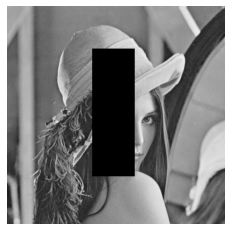

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

# 특정 셀의 값을 변경
img[100,200] = 0
# 특정 영역의 값을 변경
img[100:400, 200:300] = 0

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

#### 2) 컬러의 경우
 - 특정영역의 값을 변경할 때 컬러채널을 설정하기 때문에 튜플이나 리스트로 넣어도 됨

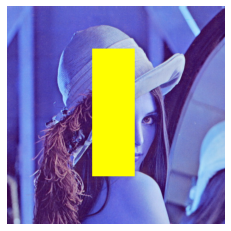

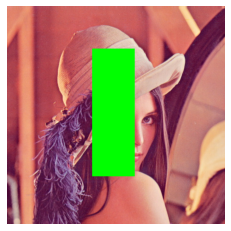

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg')


# 특정 셀의 값을 변경
img[100,200] = 0
# 영역의 값을 변경
img[100:400, 200:300] = [255,255,0] # 튜플이나 리스트로 넣어도 됨

plt.imshow(img)
plt.axis('off')
plt.show()

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2[100:400, 200:300] = (0,255,0)
plt.imshow(img2)
plt.axis('off')
plt.show()


### 4. 마우스로 관심 영역 선택
- selectROI()와 selectROIs()함수를 제공

```
selectROI(windowName, img[, showCrosshair[fromCenter]]) -> retval
```

- showCrosshaire가 True이면 선택 영역에 격자가 표시되고 fromCente=True이면 마우스 클릭위치 중심을 기준으로 박스가 선택됩니다.
- 선택을 종료할 때는 Space나 Enter를 누르면 되고 retval에 선택 영역의 튜플(x, y, width, height)이 리턴됩니다.
- c 키를 누르면 선택이 취소됩니다.

```
selectROIs(windowName, img[, showCrosshair[fromCenter]]) -> boundingBoxes
```
- 다중 선택을 지원합니다.
- 여러 개 선택시 Space나 Enter를 누르면 되고 선택 영역을 취소하려면 c 선택을, 종료하려면 R키를 누르면 선택한 영역의 리스트를 반환합니다.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

roi = cv2.selectROI(img)
print('roi : ', roi)

# 선택한 영역만 별도로 생성
# 가로, 세로
img = img[roi[1] : roi[1] + roi[3] , roi[0] : roi[0] + roi[2]]
print('x좌표 : ', roi[0])
print('y좌표 : ', roi[1])
print('너비 : ' , roi[2])
print('높이 : ', roi[3])

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

roi :  (203, 193, 170, 179)
x좌표 :  203
y좌표 :  193
너비 :  170
높이 :  179


#### 마우스로 여러 개의 영역 선택하기
- 마우스로 선택하고 space누르고 esc를 누르면 선택영역이 반환됩니다.
- esc를 한번 더 누르면 종료됩니다.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

rects = cv2.selectROIs('img', img, False, True)
print(rects)
#  선택 영역에 사각형 그리기
for r in rects:
    cv2.rectangle(img, (r[0], r[1]), (r[0] + r[2], r[1] + r[3]), 255)
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

()


### 7. 채널 분리와 병합
- split()
    - 채널을 분리하는 것은 일반적으로 컬러 영상에서 RGB값으로 분해하는 것을 의미합니다.
- merge()
    - 분리된 채널을 하나로 합치는 것입니다.

### 8. 컬러 공간 변환
- cvtColor() : GRAY, HSV, RGB, BGR, YCrCb 등의 다양한 컬러 공간 포맷으로 변환
- cvtColor(이미지 소스, 변환할 코드) -> 변환된 이미지 코드 반환

#### 변환코드
- HSV는 색상: Hue, 채도 : Saturation, 명도 : Value
- 2YCrCb는 디스플레이에 색을 표한하기 위한 색공간,  Y : 휘도, Cr 과 Cb : 색차 성분

```
cv2.COLOR_BGR2GRAY
cv2.COLOR_GRAY2BGR
cv2.COLOR_BGR2HSV
cv2.COLOR_HSV2BGR
cv2.COLOR_BGR2YCrCb
cv2.COLOR_YCrCb2BGR

## openCv는 원래 bgr순서대로 출력하기 때문에 의미가 없습니다.
cv2.COLOR_BGR2BGR
cv2.COLOR_RGB2BGR
```

## 컬러변환
- 이미지 전처리할 때 은근히 hsv로 많이 바꿉니다.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
yCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('yCrCb', yCrCb)
cv2.imshow('hsv', hsv)

cv2.waitKey()
cv2.destroyAllWindows()

### 변환

#### 1) 회전

```
cv2.rotate(회전할 이미지, rotateCode) -> 회전된 결과를 반환
rotateCode는 cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE 등
```
#### 2) Affine Transform Matrix를 이용한 변환
- Affine Transform Matrix는 이동, 회전, 크기 변환을 해주는 행렬인데 이 행렬을 이용하면 한꺼번에 변환이 가능합니다.

1. getRotationMatrix2D를 이용하여 변환행렬을 생성합니다.
```
cv2.getRotationMatrix2D(center, angle, scale) -> Matrix가 반환
```

2. cv2.warpAffine 를 이용해서 변환합니다.
    - 이 때 dsize는 반환되는 이미지의 크기 입니다.

```
cv2.warpAffine(이미지, 앞에서 구한 행렬, dsize) -> 이미지 반환
```

#### 3) 변환 행렬 - Affine Transform Matrix
- 핸드폰의 가로모드, 세로모드와 같은데서 사용됩니다.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg')

# 너비와 높이 그리고 채널의 수를 저장
rows, cols, channels = img.shape
# 변환
# 중심점의 좌표는 그대로 사용하고 45도 회전 + 절반으로 축소
m1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 1)
dst1 = cv2.warpAffine(img, m1, (rows, cols))

cv2.imshow('src', img)
cv2.imshow('affine', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

### 10. numpy의 연산 함수 이용 가능
- copy() : 복제가 가능
- 산술 연산에서 + 를 사용하면 255를 넘는 경우 256으로 나눈 나머지 값을 가지게 됩니다.   
   add를 사용하면 255가 넘어도 255로 처리합니다.

- 0과 and를 하게 되면 무조건 0이 나옵니다   
  0과 or를 하게 되면 그 데이터가 리턴됩니다.   
  xor는 같으면 0 다르면 1입니다.   



In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

data = np.zeros(shape=(512, 512), dtype=np.uint8) + 100

# 단순한 numpy의 + : 255가 넘으면 256으로 나눈 나머지
img1 = img + data

# cv2의 add연산 삼수 : 255가 넘으면 255
img2 = cv2.add(img, data)

cv2.imshow('num의 산술 연산', img1)
cv2.imshow('opencv산술 연산', img2)

cv2.waitKey()
cv2.destroyAllWindows()

### bit 연산자로 변환하기

#### bitwise_and
- 특정 영역만 그림 남기기

#### bitwise_not
- 반전

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img1 = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../data/images/opencv_logo.png')

# img2의 영역크기 저장
rows, cols, channels = img2.shape
# 첫번째 이미지에서 두번째 이미지의 영역만큼의 데이터만 가져오기
roi = img1[0:rows, 0:cols]

# 컬러 변환
gray = cv2.cvtColor(img2, cv2. COLOR_BGR2GRAY)
# 임게값을 설정하는 함수
# gray에서 값이 두번째값을 넘는 경우와 그렇지 않음에 따라 나누기
# 다른 값을 설정하는데 맨 뒤의 place
# THRESH_BINARY 주번째 값보다 크면 그 값을 이용하고 그렇기 않으면 0
# THRESH_BINARY_INV 두번때보다 크면 0, 그렇지 않으면 값을 이용


# mask 가 연산을 수행한 배열이고 ret 은 수행했을 때의 결과를 가지고 있습니다.
# 컬러이미지를 하고자 하면 채널을 분리이용해서 분리한 각각을 가
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(mask)

# bit_and 둘다 1일 때만 1, mask를 설정하면 mask영역에만 적용됩니다.
# bit_and = cv2.bitwise_and(roi, roi,  mask = mask)

# 특정 영역만 그림 남기기
bit_and = cv2.bitwise_and(roi,roi,  mask = mask_inv)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.imshow('bit_and', bit_and)

cv2.waitKey()
cv2.destroyAllWindows()

### 11.수학 및 통계 관련 함수도 존재
- 정규화 관련 함수, 통계 관련 함수 등도 있음
- 난수나 선형대수(eigen vector나 PCA함수 등)에 관련된 함수도 존재합니다. 

### 12.임계값 영상
- ```threshold``` 와 ```adpativeThreshold``` 함수를 이용해서 처리
- ```adpativeThreshold```는 이미지 데이터와 ```maxValue(출력 픽셀의 최대값)```와 ```adaptiveMethod(주변 픽셀의 가중치 합이나 평균을 설정)```을 설정하고 주변 픽셀의 범위를 설정하고 상수를 설정하면 주변과의 연산을 이용해서 결과를 출력합니다.
- 주로 ```threshold```는 명확히 하고자 할 때 많이 사용하고 ```adpativeThreshold```는 지우고자 할 때 사용합니다.

### 13.히스토그램 평활화
- 입력영상의 화소값에 대하여 누적 분포 함수를 변환함수로 사용하여 출력 영상의 화소값을 개선하는 방법입니다.
- 저대비의 영상에 대해 고대비 출력 영상을 얻고자 할 때 사용합니다.
- 밝기 값이 몰려있어서 어둡거나 또는 밝기만 영상을 평활화하면 선명한 영상을 얻을 수 있습니다.
- ```cv2.equlizeHist(이미지소스)``` : 각각의 값의 히스토그램을 계산 합니다. **히스토그램 bin의 합계가 255가 되도록 정규화를 수행합니다.** 히스토그램을 계산할 때 ```calcHist```함수를 이용해서 직접 계산하는 것도 가능합니다. 

#### 1) 히스토그램 평활화방식
- 일반 정규화와 정규화 방식이 다른데 일반적인 정규화는 동일한 비율로 리턴하기 때문에 1이 85라면 2는 170이 되야 하는데 ```equalizeHist```는 등장 횟수를 계산해서 조정합니다.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
src = np.array([[0,0,0,0],[1,1,3,5],[6,1,3,5],[4,3,1,7]], dtype=np.uint8)


# 평활화
dst = cv2.equalizeHist(src)
print(dst)

[[  0   0   0   0]
 [ 85  85 149 212]
 [234  85 149 212]
 [170 149  85 255]]


#### 2) 흑백이미지의 히스토그램 평활화

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.equalizeHist(img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)

cv2.waitKey()
cv2.destroyAllWindows()

#### 3) 컬러이미지의 히스토그램 평활화

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./data/images/lena.jpg')
# 채널(색상) 분해
r, g, b = cv2.split(img1)

# 채널별로 평활화
r2 = cv2.equalizeHist(r)
g2 = cv2.equalizeHist(g)
b2 = cv2.equalizeHist(b)
img2 = cv2.merge([r2,g2,b2])

# hsv형식(밝기)을 히스토그램 평활화
temp = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(temp)
v2 = cv2.equalizeHist(v)
imsi = cv2.merge([h, s, v2])
img3 = cv2.cvtColor(imsi, cv2.COLOR_HSV2BGR)

# 원본 이미지
cv2.imshow('img1', img1)
# 색상을 평활화한 이미지
cv2.imshow('img2', img2)
# hsv형식을 히스토그램 평활화한 이미지
cv2.imshow('img3', img3)

cv2.waitKey()
cv2.destroyAllWindows()

#### 4) calcHist를 이용한 평활화

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('../data/images/lena.jpg')
cv2.imshow('img1',img1)


hsv = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
v2 = cv2.equlizeH


r,g,b = cv2.equalizeHist(img1)
img2 = cv2.merge([r2,g2,b])
# 채널(색상) 분해
r, g, b = cv2.split(img1)

# 채널별로 평활화
r2 = cv2.equalizeHist(r)
g2 = cv2.equalizeHist(g)
b2 = cv2.equalizeHist(b)

img2 = cv2.merge([r2,g2,b2])
# print(img2)

hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

# 원본 이미지
cv2.imshow('img1', img1)
# 색상을 평활화한 이미지
cv2.imshow('img2', img2)


plt.imshow(img)
plt.title(hist2)
plt.plot(hist2)

[[202 200 197 ... 197 153  86]
 [200 200 200 ... 205 158  78]
 [200 200 202 ... 200 158  83]
 ...
 [  5   4  19 ...  75  63  51]
 [  5   6  30 ...  75  69  72]
 [  6  10  35 ...  72  72  80]] [[197 195 193 ... 207 179 139]
 [195 195 195 ... 212 185 135]
 [195 195 197 ... 210 187 140]
 ...
 [ 16  14  30 ...  84  79  73]
 [ 11  12  36 ...  81  84  86]
 [ 12  16  38 ...  79  86  89]] [[213 210 210 ... 240 195 131]
 [210 210 210 ... 237 185 116]
 [210 210 213 ... 226 180 118]
 ...
 [  6   5  19 ...  94  94  94]
 [  4   5  25 ...  98 104 107]
 [  5   7  28 ...  96 107 115]]
[[[202 197 213]
  [200 195 210]
  [197 193 210]
  ...
  [197 207 240]
  [153 179 195]
  [ 86 139 131]]

 [[200 195 210]
  [200 195 210]
  [200 195 210]
  ...
  [205 212 237]
  [158 185 185]
  [ 78 135 116]]

 [[200 195 210]
  [200 195 210]
  [202 197 213]
  ...
  [200 210 226]
  [158 187 180]
  [ 83 140 118]]

 ...

 [[  5  16   6]
  [  4  14   5]
  [ 19  30  19]
  ...
  [ 75  84  94]
  [ 63  79  94]
  [ 51  73  94]]

 [

### 14. 역투영
- 샘플의 히스토그램을 계산하고 역투영하게 되면 일치하는 영역만 추출할 수 있습니다.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('../data/images/fruits.jpg')

# 이미지를 HSV형식으로 변환
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 이미지를 복제
draw = img.copy()

# 역투영된 결과를 받아서 마스킹한 후 출력하는 함수
def masking(bp, win_name):
    #  출력할 크기 설정
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    # 필터
    cv2.filter2D(bp, -1,disc, bp)
    
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

# 역투영 함수
def backProject_cv(hist_roi):
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi, [0,180,0,256], 1)
    masking(bp, 'result_cv')

(x, y, w, h)     = cv2.selectROI('img', img, False)

# 선택된 영역이 있다면
if x > 0 and h > 0:
    # 선택한 영역의 데이터를 가져옴
    # 위의 img랑 같은 것
    roi = draw[y:y+h, x:x+w]
    # HSV로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    # 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0,180,0,256])
    backProject_cv(hist_roi)
    
cv2.imshow('draw', draw)
cv2.waitKey()
cv2.destroyAllWindows()

## 이미지 필터링

### Blur 필터
- 이미지를 흐리게 하고자 할 때는 각 픽셀을 주변 픽셀의 평균값으로 변화하면 됩니다.
- 흐리게 하고자 할 때 수행하는 연산을 수학적으로 커널이라고 부릅니다.
- 커널은 이미지를 선명하게 만들 수 있고 흐리게 만드는 경계선 감지 등에도 사용됩니다.

1. 관련 함수

    - ```cv2.boxFilter(src, ddepth, ksize)```
        - ddepth를 -1로 설정하면 src와 같은 깊이로 생성됩니다.

    - ```cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)```
        - 가우시안 함수를 이용해서 엣지를 덜 약화시키면서 양방향 필터링을 수행합니다.
        - d가 필터링에 사용할 화소의 이웃을 설정할 지름입니다.
        - 일반적으로 d는 5로 설정합니다.
    - ```sigmaColor```나 ```sigmaSpace```는 색상을 만들 때 멀리 떨어질 이웃을 선택할 수 있도록 해주는 옵션으로 너무 가까이 있는 색만 선택하면 색이 비슷해지기 때문입니다.

#### 박스 필터

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.boxFilter(img, ddepth = -1, ksize=(11, 11))

cv2.imshow('img', img)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

#### 양방향 필터

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg')

# 영역을 다르게 해서 박스 필터를 적용
# 영역의 크기가 커질수록 선명도가 떨어지고 흐릿해집니다.
dst1 = cv2.boxFilter(img, ddepth = -1, ksize=(11, 11))
dst2 = cv2.boxFilter(img, ddepth = -1, ksize=(21, 21))

# 양방향 필터를 적용하면 더 선명해 보입니다.
# d : 반경
dst3 = cv2.bilateralFilter(img, d = 100, sigmaColor=100, sigmaSpace=10)
dst4 = cv2.bilateralFilter(img, d = -1, sigmaColor=10, sigmaSpace=10)

# 원본사진
cv2.imshow('img', img)
# 영역을 좁게할 경우
cv2.imshow('dst1', dst1)
# 영역을 좀더 크게할 경우
cv2.imshow('dst2', dst2)
# 덜 선명
cv2.imshow('dst3', dst3)
# 더 선명
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

## 2. medianBlur

```cv2.MedianBlur(src, ksize) -> dst```
- src에 ksize * ksize영역의 중위수를 계산해서 저장합니다
- src는 1(GrayScale), 3(BGR), 4(BGRA)채널 이미지 가능
- 점들이 흩뿌려져 있는 형태의 이미지에서는 평균 필터나 가우시안 필터보다 더 효과적입니다
점을 흩뿌려져 있는 형태는 평균에 영향을 미칩니다.

## 3. Blur필터

```cv2.Blur(src, ksize) -> dst ```
- ksize만큼의 내부의 합계를 계산하고 커널 크기로 정규화를 수행한 박스 필터입니다.


## 4. GausianBlur

```cv2.GausianBlur(src, ksize, sigmaX, sigmaY) -> dst ```
- 가우시안 커널을 적용합니다.
- 잡음 제거에 많이 사용됩니다.
- ```sigmaX```와 ```sigmaY```는 X축 및 Y축방향으로의 가우시안 커널 표준 편차입니다.
- 이미지가 스무스해지는 효과를 줍니다.


### blur적용 예시
- 원본이 더 선명해 보입니다
- 가우시안필터에 편차를 더 심하게 주면 값의 분포가 더 넓어 집니다.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 블러 필터 적용하기 - 흐릿해짐, 커널의 크기를 크게할수록 흐릿해집니다.
image_blur = cv2.blur(img, (5,5))
# 중위수 필터
median_blur = cv2.medianBlur(img, ksize=7)
# 가우시안 필터
gaussian_blur = cv2.GaussianBlur(img, ksize=(5,5),sigmaX=100,sigmaY=10)

# 원본
cv2.imshow('img', img)
# blur처리
cv2.imshow('img_blur', image_blur)
# 중위수 필터
cv2.imshow('median_blur', median_blur)
# 가우시안 필터
cv2.imshow('gaussian_blur', gaussian_blur)

cv2.waitKey()
cv2.destroyAllWindows()

## 5) Sobel 필터
- 앞에서 배운 필터는 흐릿하게 했다면, 미분 필터의 한 종류로 영상을 날카롭게 만들거나 엣지를 검출할 때 사용합니다.

```dst = cv2.Sobel(src, ddepth, dx, dy, dst, ksize, scale, delta, borderType)```


- src: 원본 이미지
- ddepth: 출력 이미지의 dtype (-1: 입력 영상과 동일한 구조)
- dx, dy: x와 y축의 미분 차수 (0, 1, 2 중 선택, 둘 다 0일 수는 없음)
- ksize: 커널의 크기 (1, 3, 5, 7 와 같은 홀수로 설정해야 함)   
    가로와 세로의 영역이므로 곱셈을 해야하는데 가로세로의 크기가 다르면 남는 부분이 생기므로 대부분의 경우 정방행렬의 형태여야 합니다.
    - 홀수만 가능한 이유는 중위수 구해야하기 때문입니다.
- scale: 미분에 사용할 계수
- delta: 연산 결과에 가산할 값 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/rect.jpg', cv2.IMREAD_GRAYSCALE)

gx = cv2.Sobel(img, cv2.CV_32F, 2, 0, ksize=3) # y축 선만 감지합니다
gy = cv2.Sobel(img, cv2.CV_32F, 0, 2, ksize=3) # x축선만 감지합니다.

# x를 정규화
# dstX = cv2.sqrt(np.abs(gx))
# dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# x를 정규화
mag = cv2.magnitude(gx, gy)
dst = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)


# 원본
cv2.imshow('img', img)
# blur처리
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

## 6) Laplacian 필터
-2차 미분을 이용하여 경계선을 감지합니다.
- 경계를 더 제대로 검출할 수 있습니다.
```cv2.Laplacian(src, ddepth, ksize)```


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)

resize_img =  cv2.resize(img, dsize=(500,500), interpolation=cv2.INTER_AREA)
# 가우시안 필터 적용 - 이미지가 흐릿해짐
blur = cv2.GaussianBlur(resize_img, ksize=(7, 7), sigmaX=0.0)
# 원본 사진에 라플라시안 필터 적용
lapla = cv2.Laplacian(resize_img, -1, ksize=3) # y축 선만 감지합니다



# 원본
cv2.imshow('img', resize_img)
# blur처리
cv2.imshow('blur', blur)
# blur처리
cv2.imshow('blur', lapla)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)

# 원본
cv2.imshow('img', resize_img)

# 가우시안 필터 적용 - 이미지가 흐릿해짐
blur = cv2.GaussianBlur(resize_img, ksize=(7, 7), sigmaX=0.0)
# blur처리
cv2.imshow('blur', blur)

# 원본 사진에 라플라시안 필터 적용
lapla = cv2.Laplacian(resize_img, -1, ksize=3) # y축 선만 감지합니다
cv2.imshow('original_to_lapla', lapla)

# 라플라시안 적용하고 정규화
dst = cv2.convertScaleAbs(lapla)
dst = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('lapla_normalization', dst)

# 가우시안 필터 적용 후 라플라시안 필터 적용
lapla2 = cv2.Laplacian(blur, -1, ksize=5) # y축 선만 감지합니다
cv2.imshow('Gaussian_to_lapla', lapla2)

cv2.waitKey()
cv2.destroyAllWindows()

## 7. 직접 필터 연산 가능
- 컨볼루션 연산을 통한 필터

```cv2.filter2D(src, ddepth, kernel, anchor, delta)```

- src: 원본 데이터, Numpy 배열
- ddepth: 출력 영상의 dtype (-1: 입력 영상과 동일)
- kernel: 컨볼루션 커널, float32의 n x n 크기 배열, 1-채널 실수 배열을 설정해서 연산을 수행합니다
- dst(optional): 결과 영상
- anchor(optional): 커널의 기준점, default: 중심점 (-1, -1). 커널의 중심점으로 kernel내의 위치를 나타냅니다.
- delta(optional): 필터가 적용된 결과에 추가할 값
- borderType(optional): 외곽 픽셀 보정 방법 지정


```cv2.sepfilter2D(src, ddepth, kernel, anchor, delta)```

- src: 원본 데이터, Numpy 배열
- ddepth: 출력 영상의 dtype (-1: 입력 영상과 동일)
- kernelX는 행에 적용하고, kernelY는 열에 적용합니다. Sobel필터와 마찬가지로 같은 크기로 지정하는 것이 좋습니다.
- anchor(optional): 커널의 기준점, default: 중심점 (-1, -1). 커널의 중심점으로 kernel내의 위치를 나타냅니다.
- delta(optional): 필터가 적용된 결과에 추가할 값

### filter2D사용

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)
# 원본
cv2.imshow('img', resize_img)

# x축 방향의 잡음 제거
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)
gx = cv2.filter2D(resize_img, cv2.CV_32F, sobelX)

# y축 방향의 잡음 제거
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)
gy = cv2.filter2D(resize_img, cv2.CV_32F, sobelY)

mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

# mag2 = cv2.magnitude(gx2, gy2)
# ret2, edge2 = cv2.threshold(mag2, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

### sepFilter2D사용

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)
# 원본
cv2.imshow('img', resize_img)

# x축 방향의 잡음 제거
kx, ky = cv2.getDerivKernels(1, 0, ksize=3)
sobelX = ky.dot(kx.T)
gx = cv2.sepFilter2D(resize_img, cv2.CV_32F, kx, ky)

# y축 방향의 잡음 제거
kx, ky = cv2.getDerivKernels(0, 1, ksize=3)
sobelY = ky.dot(kx.T)
gy = cv2.sepFilter2D(resize_img, cv2.CV_32F, kx, ky)

mag = cv2.magnitude(gx, gy)
ret, edge = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)

# mag2 = cv2.magnitude(gx2, gy2)
# ret2, edge2 = cv2.threshold(mag2, 100, 255, cv2.THRESH_BINARY)

cv2.imshow('edge', edge)
cv2.waitKey()
cv2.destroyAllWindows()

## 8) 모폴리지 연산
- 구조 요소를 이용해서 반복적으로 영역을 확장시켜서 떨어진 부분 또는 구멍을 채우거나 잡음을 축소하여 제거하는 등의 연산. 침식(erode), 팽창(dilate), 열기(opening), 닫기(closing) 등이 있습니다.
- 이와 관련된 함수는 getStructuringElement(), erode(), dilate(), morphologyEx() 등이 있습니다

```getStructuringElement(shape, ksize, anchor)```
- 어느 영역에 대해 잡음을 처리할 것인지 **구조 요소를 생성해주는 함수**입니다. 
- shape: 구조화 요소 커널 모양 (cv2.MORPH_RECT: 사각형, cv2.MORPH_EPLIPSE: 타원형, cv2.MORPH_CROSS: 십자형)
- ksize: 커널 크기
- anchor(optional): 구조화 요소의 기준점, cv2.MORPH_CROSS에만 의미 있으며 기본 값은 중심점 (-1, -1)

```dst = cv2.morphologyEx(src, op, kernel, dst, anchor, iteration, borderType, borderValue)```

- src: 입력 영상
- op: 모폴로지 연산 종류 (cv2.MORPH_OPEN: 열림 연산, cv2.MORPH_COLSE: 닫힘 연산, cv2.MORPH_GRADIENT: 그레디언트 연산, cv2.MORPH_TOPHAT: 탑햇 연산, cv2.MORPH_BLACKHAT: 블랙햇 연산)
- kernel: 구조화 요소 커널
- dst(optional): 결과 영상
- anchor(optional): 커널의 기준점
- iteration(optional): 연산 반복 횟수
- borderType(optional): 외곽 영역 보정 방법
- borderValue(optional): 외곽 영역 보정 값

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)
# 원본
cv2.imshow('img', resize_img)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))

# erode:침식
# iterations:반복 횟수
erode = cv2.erode(resize_img, kernel, iterations=5)
cv2.imshow('erode', erode)

erode2 = cv2.erode(resize_img, kernel, iterations=3)
cv2.imshow('erode2', erode2)

# dilate:팽창 
dilate = cv2.dilate(resize_img, kernel, iterations=5)
cv2.imshow('dilate', dilate)

cv2.waitKey()
cv2.destroyAllWindows()

### closing
-  주변보다 밝은 노이즈를 제거하는데 사용됩니다.

### opening
- 흰색 물체의 테두리를 검출할 수 있습니다.

### gradient
- 두꺼운 테두리를 검출

### tophat
- 검은색 배경 속의 흰색 점을 검출합니다.

### blackhat
- 흰색 물체 속에서 검은색 점을 검출합니다

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/x-ray.jpg', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)
# 원본
cv2.imshow('img', resize_img)

kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3,3))
closing = cv2.morphologyEx(resize_img, cv2.MORPH_CLOSE, kernel, iterations=5)
cv2.imshow('closing', closing)

opening = cv2.morphologyEx(resize_img, cv2.MORPH_OPEN, kernel, iterations=5)
cv2.imshow('opening', opening)

gradient = cv2.morphologyEx(resize_img, cv2.MORPH_GRADIENT, kernel, iterations=5)
cv2.imshow('gradient', gradient)

tophat = cv2.morphologyEx(resize_img, cv2.MORPH_TOPHAT, kernel, iterations=5)
cv2.imshow('tophat', tophat)

blackhat = cv2.morphologyEx(resize_img, cv2.MORPH_BLACKHAT, kernel, iterations=5)
cv2.imshow('blackhat', blackhat)

cv2.waitKey()
cv2.destroyAllWindows()

- openCV로 머신러닝도 할 수 있습니다.
## 4. 템플릿 매칭
- 객체탐지
- reference image에서 template image가 매칭되는 위치를 찾는 방법입니다.
- OpenCV의 템플릿 매칭은 이동에대한 문제는 쉽게 해결할 수 있지만, 회전 및 스케일링 물체에 대해서는 쉽지 않습니다.
- 이런 문제를 해결하기 위해서는 여러 개의 템플릿을 이용하거나 영상의 밝기를 조절하기도 하고 엣지나 코너점 및 주차수 변환 등으로 변환해서 템플릿 매칭을 수행하기도 합니다.
- 특히 밝기 문제는 정규화를 하게되면 대부분 해결됩니다.
- 찾는 방법은 상관관계를 이용하는 방법과 차분의 합(SAD:Sum of Absolute Difference)을 이용하는 방법 등이 있습니다. 차분의 합을 구할 때는 차분이 + 혹은 -이므로 절댓값을 취하여 합해야 합니다.
- 이때, 상관계수가 1이라는 것은 2개의 데이터가 일치하는 것이 아니고 증감하는 패턴이 일치하거나 순위가 일치하다는 뜻입니다.

```cv2.matchTemplate(image, template, method, result) -> result ```
- img: 입력 이미지
- templ: 템플릿 이미지
- method: 매칭 메서드 (cv2.TM_SQDIFF: 제곱 차이 매칭, 완벽 매칭:0, 나쁜 매칭: 큰 값 / cv2.TM_SQDIFF_NORMED: 제곱 차이 매칭의 정규화 / cv2.TM_CCORR: 상관관계 매칭, 완벽 매칭: 큰 값, 나쁜 매칭: 0 / cv2.TM_CCORR_NORMED: 상관관계 매칭의 정규화 / cv2.TM_CCOEFF: 상관계수 매칭, 완벽 매칭:1, 나쁜 매칭: -1 / cv2.TM_CCOEFF_NORMED: 상관계수 매칭의 정규화)
- result(optional): 매칭 결과, (W - w + 1) x (H - h + 1) 크기의 2차원 배열 [여기서 W, H는 입력 이미지의 너비와 높이, w, h는 템플릿 이미지의 너비와 높이]
- mask(optional): TM_SQDIFF, TM_CCORR_NORMED인 경우 사용할 마스크

#### 원본테이터에서 템플릿 이미지 매칭하기

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
img = cv2.imread('../data/images/alphabet.bmp', cv2.IMREAD_GRAYSCALE)
resize_img =  cv2.resize(img, dsize=(0,0),fx=0.5,fy=0.5, interpolation=cv2.INTER_AREA)
# 원본


# 템플릿 매칭할 이미지 가져오기
temp_A = cv2.imread('../data/images/A.bmp', cv2.IMREAD_GRAYSCALE)


R1 = cv2.matchTemplate(img, temp_A, cv2.TM_SQDIFF_NORMED)
print(R1)

# 가장 비슷한 영역의 좌표 찾기
minVal, _, minLoc, _ = cv2.minMaxLoc(R1)
# 제일 적은 값, 위치
print(minVal, minLoc)

# 컬러로 그리기 위해서 찾을 영역을 다시 BGR로 변환합니다.
dst = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# 사각형을 그릴 높이와 너비 설정
w, h =temp_A.shape[:2]
# 왼쪽 상단 좌표에서 높이와 너비를 이용해서 사각형을 그림
cv2.rectangle(dst, minLoc, ((minLoc[0] + h),  (minLoc[1] + w)), 
             (255, 0, 0), 3)

cv2.imshow('img', resize_img)
cv2.imshow('a', temp_A)
cv2.imshow('SQDIFF_NORMED', dst)
cv2.waitKey()
cv2.destroyAllWindows()

[[0.43006483 0.43609342 0.44534802 ... 0.39194614 0.39194614 0.39194578]
 [0.43382016 0.44009125 0.44975823 ... 0.39194614 0.39194614 0.39194578]
 [0.4371895  0.44372645 0.45372277 ... 0.39194614 0.39194614 0.39194578]
 ...
 [0.39194596 0.39194596 0.39194596 ... 0.39194614 0.39194614 0.39194614]
 [0.39194614 0.39194614 0.39194614 ... 0.39194614 0.39194614 0.39194614]
 [0.39194614 0.39194614 0.39194614 ... 0.39194614 0.39194614 0.39194596]]
3.929205263375479e-07 (18, 20)


## 영상 분할
- image segmentation은 입력 영상에서 관심 영역을 분리하는 과정입니다
- 영상 분석, 물체 인식, 추적 등 대부분의 영상 처리 응용에서 필수적인 단계
- 영상 분할은 경계선을 이용한 분할이고 영역으로 분할하는 것입니다.
- Canny 에지 검출 :경계선 감지를 할 수 있습니다.
- Harris Corner 감지기 : 2개의 경계선이 교차하는 지점을 감지하는 방법입니다.이미지가 같아야 검출할 수 있습니다.
- Shi-Tomasi 감지기 : 모서리를 감지합니다.
- 유사한 색상이 많이 사용되는 경우는 컬러 검출 등도 사용
- 영역 채우기나 인페인트 

- Open CV는 머신러닝이나 딥러닝하기 좋은 형태의 이미지를 만드는 목적으로 많이 사용.
- Open CV에도 많이 사용하는 이미지 관련 학습은 되어 있고 딥러닝 알고리즘 사용 가능
- ANN(인공 신경망), DNN(심층 신경망 - 망이 여러개), CNN(합성곱 신경망)을 위한 클래스가 준비되어 있습니다.
- OpenCV는 보통 tensorflow를 사용합니다

- inRange : 해당 색상에 해당하는 부분에 대해 영역을 분할 해줍니다. Threshold를 이용한 것과 비슷한 효과를 냅니다.

## K-Means클러스터링 영역 검출
- 몇개로 군집해야 할지를 정해야합니다.
